In [2]:


import pandas as pd

data = pd.read_csv(r"C:\Users\GILL\PROJECT_3\sba_loans_featured.csv")
features = ['GrossApproval', 'SBAGuaranteedApproval', 'InitialInterestRate', 'TerminMonths', 'JobsSupported']

X_cluster = data[features]

X_cluster.head()


,GrossApproval,SBAGuaranteedApproval,InitialInterestRate,TerminMonths,JobsSupported
0,250000.0,187500.0,6.00,90,4.0
1,1115000.0,836250.0,7.00,250,7.0
2,350000.0,175000.0,7.75,120,7.0
3,1185000.0,888750.0,7.25,120,7.0
4,82900.0,41450.0,6.05,60,4.0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


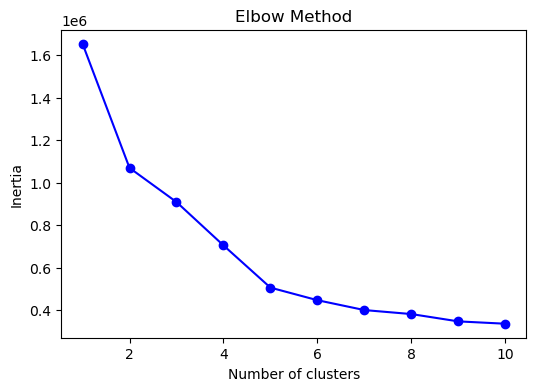

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [5]:

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to original dataframe
data['Cluster'] = clusters
data['Cluster'].value_counts()


Cluster
0    264127
1     58625
2      7951
Name: count, dtype: int64

In [6]:
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary)


         GrossApproval  SBAGuaranteedApproval  InitialInterestRate  \
Cluster                                                              
0         2.223623e+05           1.607741e+05             9.092834   
1         1.701446e+06           1.320347e+06             6.795047   
2         1.580107e+06           1.199522e+06             7.870661   

         TerminMonths  JobsSupported  
Cluster                               
0          111.487330       7.547233  
1          260.900827      12.134260  
2          138.270029      99.726701  


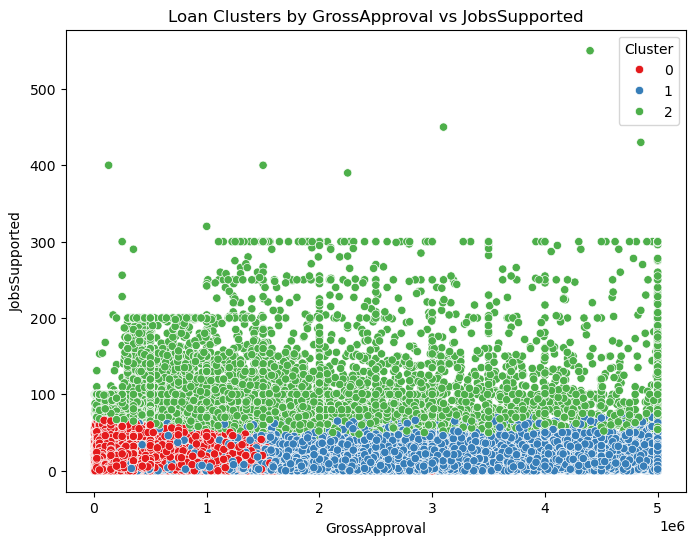

In [7]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='GrossApproval', 
    y='JobsSupported', 
    hue='Cluster', 
    data=data, 
    palette='Set1'
)
plt.title('Loan Clusters by GrossApproval vs JobsSupported')
plt.show()


In [10]:
comment = """Cluster 0 → high loan amounts, high jobs → maybe low-risk large borrowers

Cluster 1 → small loans, few jobs → maybe medium-risk

Cluster 2 → high interest rates, low SBA guaranteed → maybe high-risk"""

In [11]:
data.to_csv('sba_loans_featured.csv', index=False)


In [12]:
import pandas as pd

df = pd.read_csv('sba_loans_featured.csv')
print(df.columns)
print(df['Cluster'].value_counts())


Index(['Program', 'BorrCity', 'BorrState', 'BorrZip', 'BankName',
       'BankFDICNumber', 'BankCity', 'BankState', 'BankZip', 'GrossApproval',
       'SBAGuaranteedApproval', 'ApprovalFY', 'ProcessingMethod', 'Subprogram',
       'InitialInterestRate', 'FixedorVariableInterestRate', 'TerminMonths',
       'NAICSCode', 'NAICSDescription', 'ProjectCounty', 'ProjectState',
       'SBADistrictOffice', 'CongressionalDistrict', 'BusinessType',
       'BusinessAge', 'GrossChargeoffAmount', 'RevolverStatus',
       'JobsSupported', 'CollateralInd', 'SoldSecondMarketInd', 'DefaultFlag',
       'LoanToGuaranteeRatio', 'InterestRate', 'GrossApproval_log',
       'SBAGuaranteedApproval_log', 'BorrState_encoded',
       'ProjectState_encoded', 'BusinessType_encoded', 'BusinessAge_encoded',
       'NAICSDescription_encoded', 'BankName_encoded', 'Cluster'],
      dtype='object')
Cluster
0    264127
1     58625
2      7951
Name: count, dtype: int64
